# First Assingment of Pattern Recognition, Adv.
### Masanori Tsutsumi


## Introduction

 I used Energey efficiency Data Set.  
 I could load this data from "ENB2012_data.xlsx". I found this dataset at UCI Machine Learning Repository(http://archive.ics.uci.edu/ml/index.php).
 The Energy Efficiency Dataset is the dataset on building energy efficiency that includes eight explanatory variables and two objective variables (heating and cooling loads). This dataset is mainly used to apply multivariate regression to predict building energy efficiency.
 
This dataset consists of  
Input variables:  
X1 - Relative Compactness  
X2 - Surface Area  
X3 - Wall Area  
X4 - Roof Area  
X5 - Overall Height  
X6 - Orientation  
X7 - Glazing Area  
X8 - Glazing Area Distribution  
Output variables:  
Y1 - Heating Load  
Y2 - Cooling Load

I predicted 'Heating Load' and 'Cooling Load' from 'Relative Compactness',
'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area' and 'Glazing Area Distribution'. 
First, I will use Linear Regression Model to predict Y1 and Y2. Then I will predict them by using Linear Basis Function Model with gussian basis function and grid search. Finally, I will discuss about the difference between these two models. compare these two results And I will focus on RMSE of the Linear Basis Function Model for each parameters.

In this report, I used random choice. But I set random seed when using it. So, the result of each cell is the same no matter how many times you run the cells.

## Methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
df = pd.read_excel("ENB2012_data.xlsx")
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


I loaded 'ENB2012_data.xlsx'. The five rows of this file are shown above.

In [3]:
def shuffle_data(X, y):
    np.random.seed(seed=32)
    data_index = np.arange(X.shape[0])
    np.random.shuffle(data_index)
    return X[data_index], y[data_index]

def train_test_split(X, y, test_ratio=0.2, shuffle=True):
    if shuffle:
        X, y = shuffle_data(X, y)
    train_size = len(y) - int(len(y) * test_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test

I defined "train_test_split" function in the cell above. I will use this function to split the given data into training data and test data at a ratio of 0.8 to 0.2. I will use the training dataset to train models and test dataset to evaluate the accuracy of prediction.

In [4]:
X, y = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']].values, df[['Y1', 'Y2']].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

I divided the data into training data and test data.

In [5]:
def multi_rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2, axis=0)
    rmse = np.sqrt(mse)
    avg_rmse = np.mean(rmse)
    return round(avg_rmse, 4)

I defined Root Mean Square Error(RMSE) function to evaluate how accurately the model fit to the datasets.  
Here, considering these kind of samples,

$$
\begin{equation*}
\text{input} : \textbf{x}_i = (x_{i1}, x_{i2},...,x_{iD}) (i = 1, 2,...,N)\\
\text{the number of samples} : N\\
\text{output} : \textbf{t}_i = (t_{i1}, t_{i2},...,t_{ip}) (i = 1, 2,...,N)\\
\end{equation*}
$$
RMSE for multiple output can calculated as
$$
\text{RMSE} = \frac{1}{p} \sum_{i=1}^{p} \sqrt{\frac{1}{N} \sum_{j=1}^{N}(\hat{t}_{ji} - t_{ji})^2}
$$
First, I will predict the target variables by using Linear Regression Model.  
when the design matrix $X$ and target variables $\textbf{t}$ are  
$$
     X = \begin{pmatrix}\
1 & x_{11} & x_{12} & \cdots & x_{1D}\\
1 & x_{21} & x_{22} & \cdots & x_{2D}\\
\vdots & & \ddots & \vdots\\
1& x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{pmatrix}, 
\begin{equation*}
\textbf{t} = \begin{pmatrix}
t_{11} & t_{12} & \cdots & t_{1p}\\
t_{21} & t_{22} & \cdots & t_{2p}\\
\vdots & & \ddots & \vdots\\
t_{N1} & t_{N2} & \cdots & t_{Np}\\
\end{pmatrix}\\
\end{equation*}
$$
We can find the optimized weights of Linear Regression Models $W^*$  
$$
W^* = (X^T X)^{-1}X^T \textbf{t}
$$ 
Then, predicted target objectives $\hat{\textbf{t}}$ is calculated.
$$
\hat{\textbf{t}} = XW^*
$$ 

In [6]:
class MultivariateLinearRegressionModel:
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        X_hat = np.concatenate((np.ones((len(X), 1)), X), axis = 1)
        self.weights = np.linalg.inv(X_hat.T @ X_hat) @ X_hat.T @ y

    def predict(self, X):
        X_hat2 = np.concatenate((np.ones((len(X), 1)), X), axis = 1)
        y_pred =  X_hat2 @ self.weights
        return y_pred

I implemented MaltivariateLinearRegressionModel class.
First, I will predict the target variables by using it.  
After that, I will use Linear Basis Function Model with gaussian basis function.

In [7]:
def gaussian_basis_function(x, mu, s):
    return np.exp(-np.sum((x - mu)**2)/(2*s**2))

gaussian basis function
$$
\phi_j(x)=\exp\left(-\frac{||x-\mu_j||_2^2}{2s_j^2}\right)
$$
here  
$x$ : input (vector)  
$\mu_j$ : mean (vector)  
$s_j$ : standard deviation (scaler)

I will use gaussian basis function for Linear Basis Function Model. The inputs are the observation, mean values and standard deviation.

In [8]:
num_basis_functions = 4

In [9]:
class LinearBasisFunctionModel:
    def __init__(self, basis_function, num_basis_functions, mu, s):
        self.basis_function = basis_function
        self.num_basis_functions = num_basis_functions
        self.mu = mu
        self.s = s
        self.weights = None

    def fit(self, X, y):
        design_matrix = np.ones((len(X), self.num_basis_functions + 1))
        for i in range(self.num_basis_functions):
            for j in range(len(X)):
                design_matrix[j, i + 1] = np.array(self.basis_function(X[j], self.mu[i], self.s[i]))
        self.weights = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T @ y
        
    def predict(self, X):
        y_pred = np.empty((len(X), 2))
        for i in range(len(X)):
            y_pred[i] = self.weights[0] + sum(self.weights[j + 1] * self.basis_function(X[i], self.mu[j], self.s[j]) for j in range(self.num_basis_functions))
        return y_pred

In the cell above, I coded LinearBasisFunctionModel class.  
The initial inputs are basis function, the number of basis functions, the matrix of the mean set and the vector of standard deviation set which is used to calculate basis functions.  
To find the weights $W^*$, I used the design matrix as $\Phi$.  
$$\Phi = \begin{pmatrix}
\phi_{0}(x_1) & \phi_{1}(x_1) & \cdots & \phi_{M-1}(x_1)\\
\phi_{0}(x_2) & \phi_{1}(x_2) & \cdots & \phi_{M-1}(x_2)\\
\vdots & & \ddots & \vdots\\
\phi_{0}(x_N) & \phi_{1}(x_N) & \cdots & \phi_{M-1}(x_N)\\
\end{pmatrix}\\
\phi_{0}(x_i) = 1, (i = 1, 2,..., N)
$$


In this report, I will fix $M$ to 5.  
Let $\textbf{t}$ be the target variable.  
when optimizing weights, the calculation is like the following equation.

$$
\begin{equation*}
W^* = (\Phi^T\Phi)^{-1}\Phi^T \textbf{t}
\end{equation*}
$$


By using calculated weights $W^*$, I will predict Y1 and Y2.

When using Gaussian Basis Function, I have to decide the values of mu and s. In this report, I will generate three types of mu matrices which is composed of the randomly chosen integers between 10 and 100. And I also generate three types of s vectors.

In [10]:
np.random.seed(52)
mu = np.array([np.random.randint(10, 100, 8 * 4 * 3)]).reshape(3, 4, 8)
for i in range(len(mu)):
    print("mu[{0}] = {1}".format(i, mu[i]))

mu[0] = [[38 21 23 33 96 38 42 79]
 [21 45 43 15 26 21 64 56]
 [52 71 55 89 64 86 73 49]
 [32 81 49 17 73 30 44 53]]
mu[1] = [[88 94 84 74 69 73 75 92]
 [16 35 96 25 95 36 10 48]
 [40 59 19 97 27 84 35 99]
 [20 23 75 56 69 22 30 85]]
mu[2] = [[52 19 26 32 22 38 77 65]
 [58 40 71 42 83 87 59 69]
 [67 65 69 69 64 55 17 94]
 [17 42 27 22 24 40 23 46]]


I will use these three types of mu for grid search. Then I will generate the candidates of stadard deviation s. I will create an array with as many elements as the number of basis functions with a positive integer as the first term and common difference for each candidate. This time, I choosed 30, 40, 50 as the candidates of the positive integer and they are correspond to s[0], s[1], s[2], respectively.

In [11]:
s = np.empty((3, 4))
l = [30, 40, 50]
for i in range(len(l)):
    s[i] = np.array([j * l[i] for j in range(1, num_basis_functions+1)])
    print('s[{0}]={1}'.format(i, s[i]))

s[0]=[ 30.  60.  90. 120.]
s[1]=[ 40.  80. 120. 160.]
s[2]=[ 50. 100. 150. 200.]


I created the candidates of standard deviation set.
I will also use these three types of s and do a grid search on mu and s.
Then I will calculate RMSE and compare the best RSME of Linear Basis Function Model with that of Linear Regression Model.

## Experiment

First, I will predict Y1 and Y2 by using Linear Regression Model.

In [12]:
linear_model = MultivariateLinearRegressionModel()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print('RSME: {}'.format(multi_rmse(y_pred, y_test)))

RSME: 66.7359


Second, I will predict Y1 and Y2 by using Linear Regression Model and grid search.

In [13]:
l = []
for i in range(mu.shape[0]):
    for j in range(s.shape[0]):
        model_gaussian = LinearBasisFunctionModel(gaussian_basis_function, num_basis_functions, mu[i], s[j])
        model_gaussian.fit(X_train, y_train)
        y_pred = model_gaussian.predict(X_test)
        print('RSME (mu[{0}], s[{1}]): {2}'.format(i, j, multi_rmse(y_pred, y_test)))
        l.append(multi_rmse(y_pred, y_test))

print('the lowest RMSE is {}'.format(min(l)))
print('the highest RMSE is {}'.format(max(l)))

RSME (mu[0], s[0]): 8.1959
RSME (mu[0], s[1]): 7.1318
RSME (mu[0], s[2]): 6.7866
RSME (mu[1], s[0]): 7.9594
RSME (mu[1], s[1]): 6.8672
RSME (mu[1], s[2]): 6.3965
RSME (mu[2], s[0]): 8.2712
RSME (mu[2], s[1]): 7.4553
RSME (mu[2], s[2]): 7.1126
the lowest RMSE is 6.3965
the highest RMSE is 8.2712


## Disscusion

#### RMSE of Linear Basis Function Model vs. RMSE of Linear Regression Model

 Accoding to the experiment, the lowest RMSE of Linear Basis Regression was 6.3965. I will consider this value as the RMSE of gaussian-based Linear Basis Regression. And the RMSE of Linear Regression Model was 66.7359.  
 When comparing the RMSE of Linear Regression Model and Linear Basis Regression Model, the RMSE of Linear Basis Function Model is much lower than that of Linear Regression Model. Even when considering the highest RMSE of Linear Basis Regression Model, the value is 8.2712. So, it can be said that Linear Basis Regression Model fits better than Linear Regression Model.

#### Differences in RMSE based on differences in standard deviation of linear basis function models using Gaussian basis functions

Next I will focus on RSME values of Linear Basis Fucntion Model. I did a grid search, so I will compare the RMSE of each condition.

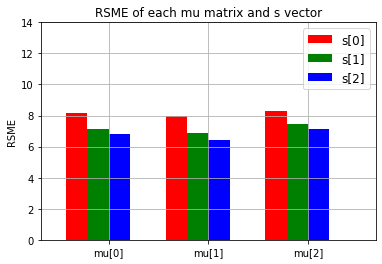

In [14]:
data = np.array(l).reshape(3, 3).T
num_sample = data.shape[0]
num_item_per_sample = data.shape[1]

width = 0.15
margin = 0.25
block = width * num_sample + margin
ind = np.arange(num_item_per_sample) * block
xlabels = ["mu[0]", "mu[1]", "mu[2]"]
legendary_labels = ["s[0]", "s[1]", "s[2]"]
colors = ["red", "green", "blue"]

for i in range(num_sample):
    plt.bar(ind + width * i, data[i], width, color=colors[i], label=legendary_labels[i])

xlocs = ind + width * num_sample / 2.
plt.xticks(xlocs, xlabels)
plt.xlim(-margin, ind[-1] + width * num_sample + margin)
plt.ylim(0, 14)
plt.ylabel('RSME')
plt.title('RSME of each mu matrix and s vector')
plt.legend(prop={'size' : 12},loc="upper right")
plt.grid(True)

The figure above shows that the values of RSME decrease as the integer of the first term of s vector bacomes big in all mu. From this fact, it is assumed that setting the parameter of standard deviation of gaussian basis function big is better for fitting.

## conclusion

In this report, I compared the RMSE of the Linear Regression Model with that of Linear Basis Function Model with gaussian basis function by using "Energey efficiency Data Set".
The above experiment and discussion revealed the following
* Linear Basis Function Regression with gaussian basis functions fits better than Linear Regression Model.
* In this dataset, it may be better to set the parameters of standard deviation of gaussian basis function big when using Linear Basis Function Model with gaussian basis function.

## reference

1. "Understanding Gaussian Basis function parameters to be used in linear regression", Cross Validated, url: https://stats.stackexchange.com/questions/117556/understanding-gaussian-basis-function-parameters-to-be-used-in-linear-regression/120126#120126, May, 9, 2023 